# Dilation, Erosion and Edge Detection 

In this kernel, we're gonna cover:
1. Dilation 
2. Erosion
3. Opening & Closing
5. Canny Edge Detection

In [1]:
# Import dependencies 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-05 17:28:14--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.102
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.4MB/s    in 1.6s    

2022-09-05 17:28:16 (17.4 MB/s) - ‘images.zip’ saved [29586716/29586716]



## Dilation, Erosion, Opening and Closing

* **Dilation** - Adds pixels to the boundaries of objects in an image
* **Erosion** - Removes pixels at the boundaries of objects in an image
* **Opening** - Erosion followed by dilation
* **Closing** - Dilation followed by erosion

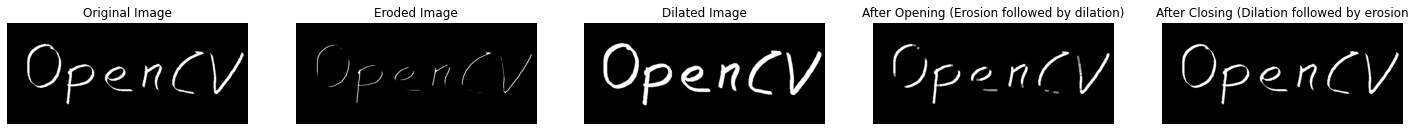

In [3]:
# Load an image
image = cv2.imread('images/opencv_inv.png', 0) # 0 for loading in grayscale 

# Define the kernel_size 
kernel_size = np.ones((5, 5), dtype = np.uint8)

# Let's do the erosion using "cv2.erode" method
eroded_image = cv2.erode(image, kernel_size, iterations = 1)

# Let's jump into the dilation using "cv2.dilate" method
dilated_image = cv2.dilate(image, kernel_size, iterations = 1)

# Let's do the Opening & Closing operations 
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel_size)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_size)

# Let's demonstrate all and see the differences using for loop
images = [image, eroded_image, dilated_image, opening, closing]
titles = ['Original Image', 'Eroded Image', 'Dilated Image', 'After Opening (Erosion followed by dilation)', 'After Closing (Dilation followed by erosion']
plt.figure(figsize = (25, 12))
for i in range(len(images)):
  plt.subplot(1, len(images), i + 1)
  plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
  plt.title(titles[i])
  plt.axis(False);

> 🔑**Note:** Opening and Closing are useful when we want to remove noises.

## Canny Edge Detection

`cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)`

Parameters:
* **image** - our input image
* **T_lower, T_upper** - These are our minVal, and maxVal respectively.
* **aperture_size** - It's the size of Sobel kernel used for find image gradients. It's 3 by default.
* **L2Gradient** - Boolean parameter used for more precision in calculating Edge Gradient.

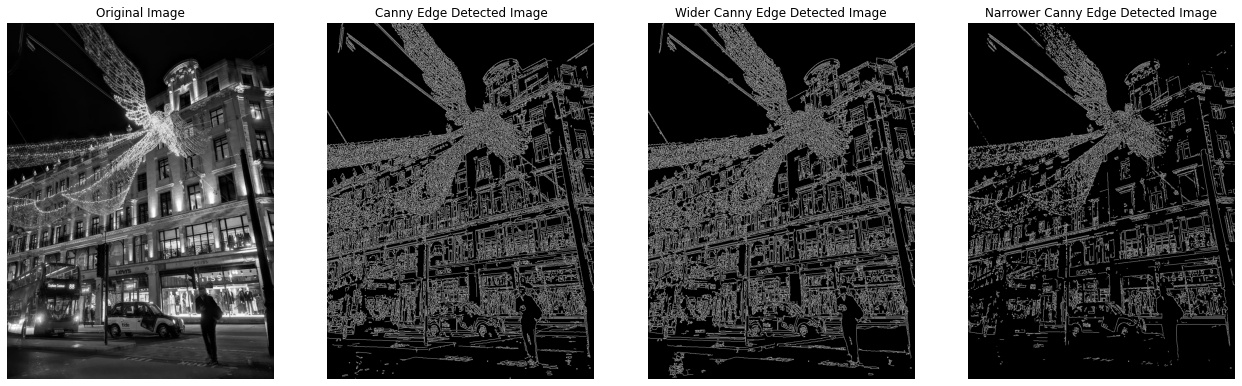

In [4]:
# Load the image
image = cv2.imread('images/londonxmas.jpeg', 0) # again, 0 for loading it in grayscale

# The first threshold gradient
canny = cv2.Canny(image, 50, 120)

# Wider edge thresholds (lots of edges)
wider_canny = cv2.Canny(image, 10, 200)

# Narrower edge thresholds (less edges)
narrower_canny = cv2.Canny(image, 200, 240)

# Let's print our images out using for loop 
images = [image, canny, wider_canny, narrower_canny]
titles = ['Original Image', 'Canny Edge Detected Image', 'Wider Canny Edge Detected Image', 'Narrower Canny Edge Detected Image']
plt.figure(figsize = (22, 16))
for i in range(len(images)):
  plt.subplot(1, len(images), i + 1)
  plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
  plt.title(titles[i])
  plt.axis(False);

> 🔑**Note:** We need to provide two values, the first is called threshold1 and the seconds is called threshold2. Any gradient value larger than threshold2 is considered to be an edge and conversely, any value below threshold1 is considered not to be an edge. But Values between threshold1 and threshold 2 are either classified as edges or non-edges based on how their intensities are **connected**. 

## Auto Canny

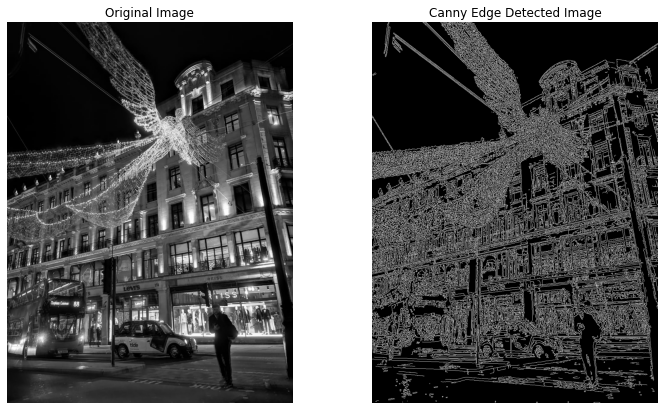

In [5]:
# Define the autoCanny function
def autoCanny(image):
  """
  Finds optimal thresholds based on median image pixel intensity
  """
  blurred_image = cv2.blur(image, ksize = (5, 5))
  median_val = np.median(image)
  lower = int(max(0, 0.66 * median_val))
  upper = int(min(255, 1.33 * median_val))
  edges = cv2.Canny(image = image, threshold1 = lower, threshold2 = upper)
  return edges

# Load the image
image = cv2.imread('images/londonxmas.jpeg', 0) # again, 0 for loading it in grayscale

# Let's use the autoCanny function
canny_edge_detected_image = autoCanny(image)

# Plot our images and compare them
# Original Image
plt.figure(figsize = (12, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis(False); 

# Canny Edge Detected Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(canny_edge_detected_image, cv2.COLOR_BGR2RGB))
plt.title('Canny Edge Detected Image')
plt.axis(False); 